In [2]:
!export PYTHONPATH=.:$PYTHONPATH

In [21]:
from odi.feature_engg import feature_extractor as fe
from odi.feature_engg import util as cricutil
from odi.preprocessing import rank
import pandas as pd
from datetime import datetime
import math
import numpy as np
from tqdm.notebook import tqdm

In [4]:
match_list_df=cricutil.read_csv_with_date('data/csv_load/cricinfo_match_list.csv')
batting_df=cricutil.read_csv_with_date('data/csv_load/cricinfo_batting.csv')

In [6]:
start_dt = cricutil.str_to_date_time("2011-01-01")
end_dt = cricutil.str_to_date_time("2019-01-01")

In [7]:
match_list_df = match_list_df[(match_list_df['date']>=start_dt) & (match_list_df['date']<end_dt)]

In [8]:
match_id_list = list(match_list_df['match_id'].unique())

In [108]:
dict_list = []
for match_id in tqdm(match_id_list):
    for innings_type in ['first','second']:
        runs = match_list_df[match_list_df["match_id"]==match_id].iloc[0][innings_type+"_innings_run"]
        team = match_list_df[match_list_df["match_id"]==match_id].iloc[0][innings_type+"_innings"]
        date = match_list_df['date'].iloc[0]
        ref_date = date.to_pydatetime()
        player_list_df = batting_df[(batting_df['match_id']==match_id) & (batting_df['batting_innings']==innings_type)]
        
        latest_batsman_rank_file = rank.get_latest_rank_file("batsman",ref_date=ref_date)
        batsman_rank_df = pd.read_csv(latest_batsman_rank_file)
        
        player_list_df = player_list_df[['team','name','position']]
        batsman_rank_df = batsman_rank_df[['batsman','country','winning_contribution','run_rate_effectiveness','correlation','batsman_score','batsman_quantile']]
        batsman_rank_df.rename(columns={'batsman':'name','country':'team'},inplace=True)
        
        player_list_df = player_list_df.merge(batsman_rank_df,how='inner',on=['name','team'])
        if player_list_df.shape[0]<11:
            continue
        player_list_df['position']=player_list_df['position'].astype(int)
        player_list_df.sort_values(['position'],inplace=True)
        
        score_sum_7 = player_list_df.head(7)['batsman_score'].sum()
        score_mean_7 = player_list_df.head(7)['batsman_score'].mean()
        
        score_sum_6 = player_list_df.head(6)['batsman_score'].sum()
        score_mean_6 = player_list_df.head(6)['batsman_score'].mean()
        
        score_sum_5 = player_list_df.head(5)['batsman_score'].sum()
        score_mean_5 = player_list_df.head(5)['batsman_score'].mean()
        
        score_sum_4 = player_list_df.head(4)['batsman_score'].sum()
        score_mean_4 = player_list_df.head(4)['batsman_score'].mean()
        
        score_sum_3 = player_list_df.head(3)['batsman_score'].sum()
        score_mean_3 = player_list_df.head(3)['batsman_score'].mean()
        
        # weighted_by_correlation
        player_list_df['score_weighted_corr']=player_list_df['batsman_score']*player_list_df['correlation']
        player_list_df['score_weighted_contr']=player_list_df['batsman_score']*player_list_df['winning_contribution']
        player_list_df['score_weighted_effectiveness']=player_list_df['batsman_score']*player_list_df['run_rate_effectiveness']
        player_list_df['log_factor'] = 13-player_list_df['position']
        #player_list_df.fillna(1,inplace=True)
        player_list_df['log_scale'] = np.log(player_list_df['log_factor'])
        player_list_df['score_weighted_log'] = player_list_df['batsman_score']*player_list_df['log_scale']
        
        score_sum_weighted_by_correlation = player_list_df.head(7)['score_weighted_corr'].sum()
        score_sum_weighted_by_contribution = player_list_df.head(7)['score_weighted_contr'].sum()
        score_sum_weighted_by_effectiveness = player_list_df.head(7)['score_weighted_effectiveness'].sum()
        score_sum_weighted_by_log = player_list_df.head(7)['score_weighted_log'].sum()
        
        score_mean_weighted_by_correlation = player_list_df.head(7)['score_weighted_corr'].sum()/player_list_df.head(7)['correlation'].sum()
        score_mean_weighted_by_contribution = player_list_df.head(7)['score_weighted_contr'].sum()/player_list_df.head(7)['winning_contribution'].sum()
        score_mean_weighted_by_effectiveness = player_list_df.head(7)['score_weighted_effectiveness'].sum()/player_list_df.head(7)['run_rate_effectiveness'].sum()
        score_mean_weighted_by_log = player_list_df.head(7)['score_weighted_log'].sum()/player_list_df.head(7)['log_scale'].sum()
        
        score_sum_weighted_by_correlation_4 = player_list_df.head(4)['score_weighted_corr'].sum()
        score_sum_weighted_by_contribution_4 = player_list_df.head(4)['score_weighted_contr'].sum()
        score_sum_weighted_by_effectiveness_4 = player_list_df.head(4)['score_weighted_effectiveness'].sum()
        score_sum_weighted_by_log_4 = player_list_df.head(4)['score_weighted_log'].sum()
        
        score_mean_weighted_by_correlation_4 = player_list_df.head(4)['score_weighted_corr'].sum()/player_list_df.head(7)['correlation'].sum()
        score_mean_weighted_by_contribution_4 = player_list_df.head(4)['score_weighted_contr'].sum()/player_list_df.head(7)['winning_contribution'].sum()
        score_mean_weighted_by_effectiveness_4 = player_list_df.head(4)['score_weighted_effectiveness'].sum()/player_list_df.head(7)['run_rate_effectiveness'].sum()
        score_mean_weighted_by_log_4 = player_list_df.head(4)['score_weighted_log'].sum()/player_list_df.head(7)['log_scale'].sum()
        
        
        player_1 = player_list_df['batsman_score'].values[0]
        player_2 = player_list_df['batsman_score'].values[1]
        player_3 = player_list_df['batsman_score'].values[2]
        player_4 = player_list_df['batsman_score'].values[3]
        player_5 = player_list_df['batsman_score'].values[4]
        player_6 = player_list_df['batsman_score'].values[5]
        player_7 = player_list_df['batsman_score'].values[6]
        
        entry = {
            "score_sum_7":score_sum_7,
            "score_sum_6":score_sum_6,
            "score_sum_5":score_sum_5,
            "score_sum_4":score_sum_4,
            "score_sum_3":score_sum_3,
            "score_sum_weighted_by_correlation":score_sum_weighted_by_correlation,
            "score_sum_weighted_by_contribution":score_sum_weighted_by_contribution,
            "score_sum_weighted_by_effectiveness":score_sum_weighted_by_effectiveness,
            "score_sum_weighted_by_log":score_sum_weighted_by_log,
            "score_mean_weighted_by_correlation":score_mean_weighted_by_correlation,
            "score_mean_weighted_by_contribution":score_mean_weighted_by_contribution,
            "score_mean_weighted_by_effectiveness":score_mean_weighted_by_effectiveness,
            "score_mean_weighted_by_log":score_mean_weighted_by_log,
            "score_sum_weighted_by_correlation_4":score_sum_weighted_by_correlation_4,
            "score_sum_weighted_by_contribution_4":score_sum_weighted_by_contribution_4,
            "score_sum_weighted_by_effectiveness_4":score_sum_weighted_by_effectiveness_4,
            "score_sum_weighted_by_log_4":score_sum_weighted_by_log_4,
            "score_mean_weighted_by_correlation_4":score_mean_weighted_by_correlation_4,
            "score_mean_weighted_by_contribution_4":score_mean_weighted_by_contribution_4,
            "score_mean_weighted_by_effectiveness_4":score_mean_weighted_by_effectiveness_4,
            "score_mean_weighted_by_log_4":score_mean_weighted_by_log_4,
            "score_mean_7":score_mean_7,
            "score_mean_6":score_mean_6,
            "score_mean_5":score_mean_5,
            "score_mean_4":score_mean_4,
            "score_mean_3":score_mean_3,
            "player_1":player_1,
            "player_2":player_2,
            "player_3":player_3,
            "player_4":player_4,
            "player_5":player_5,
            "player_6":player_6,
            "player_7":player_7,
            "innings_type":innings_type,
            "runs":runs
          
        }
        
        dict_list.append(entry)
#         print(innings_type)
#         print(team)
#         print(runs)
#         print(list(player_list_df['name']))
        
#         print("============")
        
    #break
        
        
        
        
        
        
        
        
        
        
        

In [109]:
from scipy.stats import pearsonr

In [110]:
score_df = pd.DataFrame(dict_list)

In [111]:
score_df

,score_sum_7,score_sum_6,score_sum_5,score_sum_4,score_sum_3,score_sum_weighted_by_correlation,score_sum_weighted_by_contribution,score_sum_weighted_by_effectiveness,score_sum_weighted_by_log,score_mean_weighted_by_correlation,...,score_mean_3,player_1,player_2,player_3,player_4,player_5,player_6,player_7,innings_type,runs
0,37.363380,33.624010,30.055771,25.583904,17.408991,11.464309,5.580787,33.605197,82.652158,5.489728,...,5.802997,3.887324,10.000000,3.521667,8.174914,4.471866,3.568239,3.739370,first,289.0
1,50.701704,43.651046,36.254791,30.144521,23.471736,21.878933,4.537273,47.816052,110.171254,8.058394,...,7.823912,5.153177,8.319793,9.998766,6.672784,6.110271,7.396255,7.050659,second,154.0
2,50.701704,44.028920,36.978262,29.582007,23.471736,21.878933,4.537273,47.816052,110.259855,8.058394,...,7.823912,5.153177,8.319793,9.998766,6.110271,7.396255,7.050659,6.672784,first,190.0
3,37.363380,33.624010,30.055771,25.583904,17.408991,11.464309,5.580787,33.605197,83.184031,5.489728,...,5.802997,10.000000,3.887324,3.521667,8.174914,4.471866,3.568239,3.739370,second,189.0
4,49.741461,42.381911,35.331253,27.934998,21.824727,15.171027,4.492295,46.690194,107.673241,7.844100,...,7.274909,6.672784,5.153177,9.998766,6.110271,7.396255,7.050659,7.359550,second,223.0
5,50.184313,42.824764,35.428509,28.377851,22.267580,10.797796,4.488927,47.990083,108.689008,9.218180,...,7.422527,6.672784,5.596029,9.998766,6.110271,7.050659,7.396255,7.359550,second,142.0
6,40.561681,33.601604,28.588547,23.941297,17.211539,17.184931,4.358418,39.246264,87.662979,6.519976,...,5.737180,6.164127,2.432864,8.614548,6.729757,4.647250,5.013057,6.960077,second,125.0
7,38.055997,33.042941,28.395690,24.854567,18.124810,8.015227,3.844080,26.809406,83.352361,10.000586,...,6.041603,6.164127,3.346135,8.614548,6.729757,3.541123,4.647250,5.013057,first,262.0
8,36.947739,32.300488,25.570731,20.557674,11.943126,7.724726,3.844080,26.809406,79.630507,10.037213,...,3.981042,6.164127,2.432864,3.346135,8.614548,5.013057,6.729757,4.647250,second,227.0
9,49.635581,43.232869,38.151720,31.686774,25.025677,21.209963,6.496617,43.939595,109.412552,7.310741,...,8.341892,8.124841,9.112189,7.788646,6.661097,6.464946,5.081150,6.402712,second,199.0


In [116]:
all_cols = list(score_df.columns)


In [113]:
#score_df.dropna(inplace=True)

In [117]:
target = list(score_df['runs'])
displaye_list = []
for col_idx in range(len(all_cols)-2):
    l = list(score_df[all_cols[col_idx]])
    corr,p_value = pearsonr(l, target)
    #print(all_cols[col_idx],'\t\t\t\t',corr,'\t',p_value)
    display_dict = {
        'col':all_cols[col_idx],
        'cor':corr,
        'p_value':p_value
    }
    
    displaye_list.append(display_dict)

In [120]:
score_importance_overall = pd.DataFrame(displaye_list).sort_values(['cor'],ascending=False)
score_importance_overall

,col,cor,p_value
19,score_mean_weighted_by_effectiveness_4,0.457385,0.000271
15,score_sum_weighted_by_effectiveness_4,0.455734,0.000287
29,player_4,0.437870,0.000524
10,score_mean_weighted_by_contribution,0.431997,0.000634
3,score_sum_4,0.428376,0.000712
24,score_mean_4,0.428376,0.000712
16,score_sum_weighted_by_log_4,0.424881,0.000796
20,score_mean_weighted_by_log_4,0.424881,0.000796
23,score_mean_5,0.406936,0.001381
2,score_sum_5,0.406936,0.001381


In [119]:
score_df_first = score_df[score_df['innings_type']=='first']
target = list(score_df_first['runs'])
displaye_list_first = []
for col_idx in range(len(all_cols)-2):
    l = list(score_df_first[all_cols[col_idx]])
    corr,p_value = pearsonr(l, target)
    #print(all_cols[col_idx],'\t\t\t\t',corr,'\t',p_value)
    display_dict = {
        'col':all_cols[col_idx],
        'cor':corr,
        'p_value':p_value
    }
    
    displaye_list_first.append(display_dict)

In [121]:
score_importance_first = pd.DataFrame(displaye_list_first).sort_values(['cor'],ascending=False)
score_importance_first

,col,cor,p_value
10,score_mean_weighted_by_contribution,0.517513,0.006776
15,score_sum_weighted_by_effectiveness_4,0.472849,0.014708
7,score_sum_weighted_by_effectiveness,0.431666,0.027666
29,player_4,0.429837,0.028407
3,score_sum_4,0.410486,0.037256
24,score_mean_4,0.410486,0.037256
18,score_mean_weighted_by_contribution_4,0.409670,0.037673
20,score_mean_weighted_by_log_4,0.404516,0.040389
16,score_sum_weighted_by_log_4,0.404516,0.040389
11,score_mean_weighted_by_effectiveness,0.389351,0.049294


In [122]:
score_df_second = score_df[score_df['innings_type']=='second']
target = list(score_df_second['runs'])
displaye_list_second = []
for col_idx in range(len(all_cols)-2):
    l = list(score_df_second[all_cols[col_idx]])
    corr,p_value = pearsonr(l, target)
    #print(all_cols[col_idx],'\t\t\t\t',corr,'\t',p_value)
    display_dict = {
        'col':all_cols[col_idx],
        'cor':corr,
        'p_value':p_value
    }
    
    displaye_list_second.append(display_dict)

In [123]:
score_importance_second = pd.DataFrame(displaye_list_second).sort_values(['cor'],ascending=False)
score_importance_second

,col,cor,p_value
17,score_mean_weighted_by_correlation_4,0.509364,0.002465
19,score_mean_weighted_by_effectiveness_4,0.474109,0.005314
6,score_sum_weighted_by_contribution,0.446736,0.009154
23,score_mean_5,0.435561,0.011291
2,score_sum_5,0.435561,0.011291
29,player_4,0.427244,0.013143
3,score_sum_4,0.425753,0.013500
24,score_mean_4,0.425753,0.013500
20,score_mean_weighted_by_log_4,0.423922,0.013950
16,score_sum_weighted_by_log_4,0.423922,0.013950


/opt/anaconda3/envs/tensor230/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/anaconda3/envs/tensor230/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/anaconda3/envs/tensor230/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created th

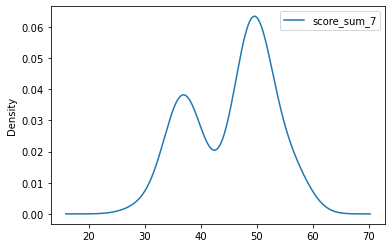

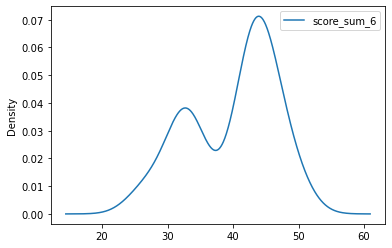

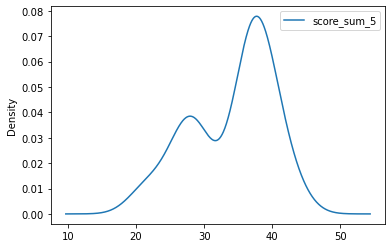

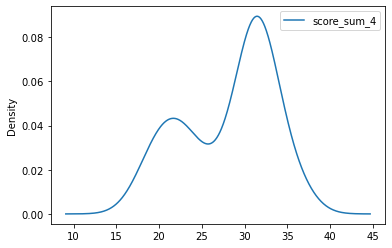

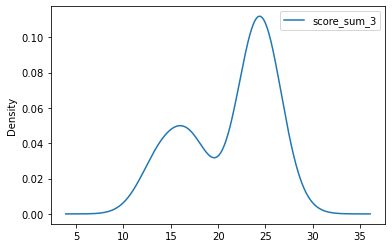

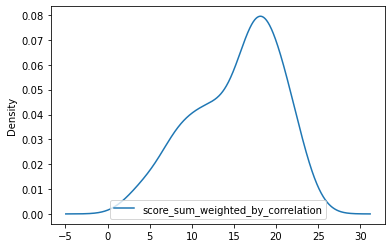

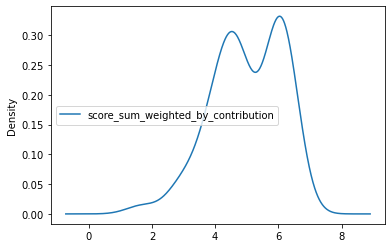

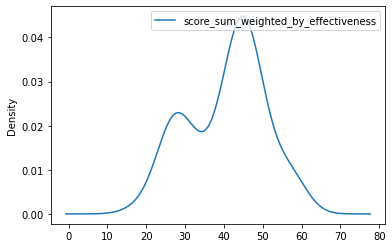

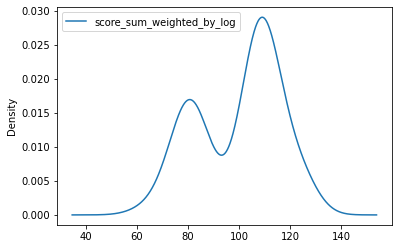

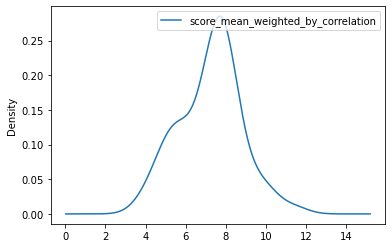

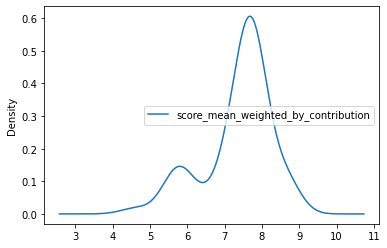

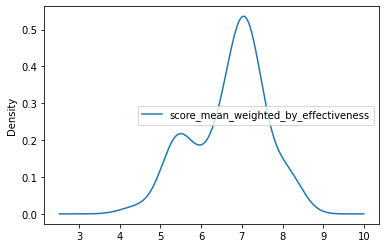

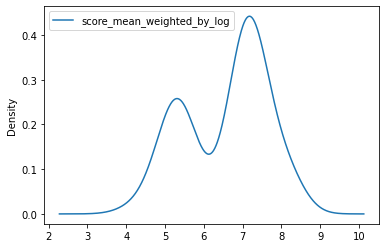

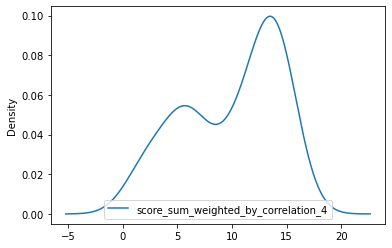

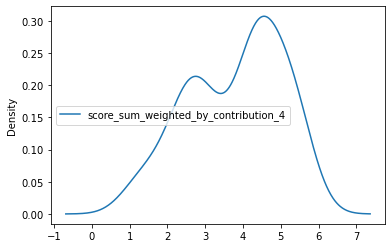

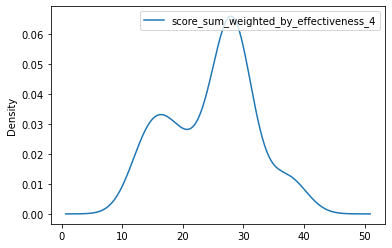

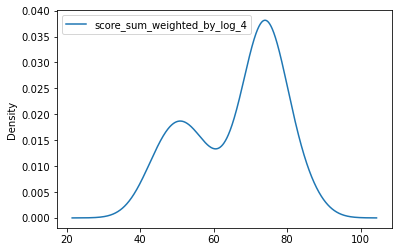

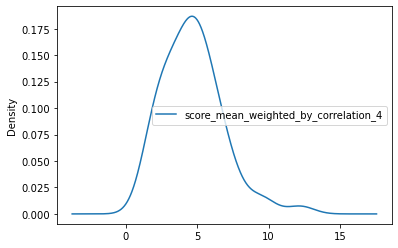

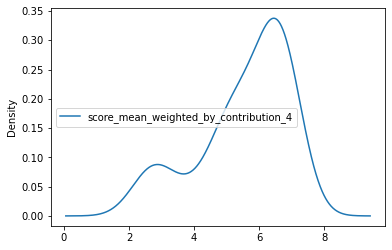

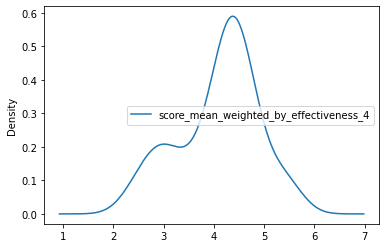

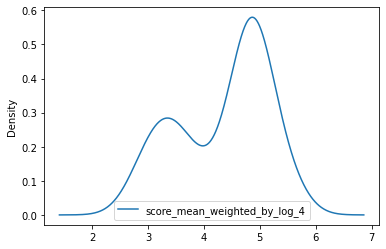

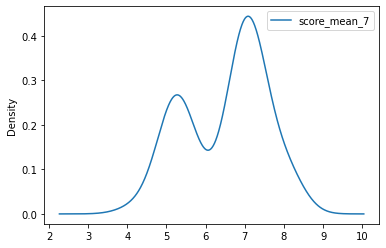

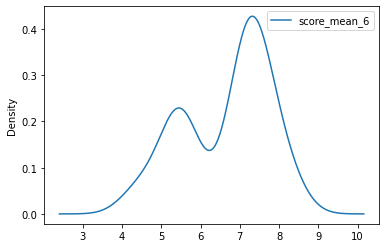

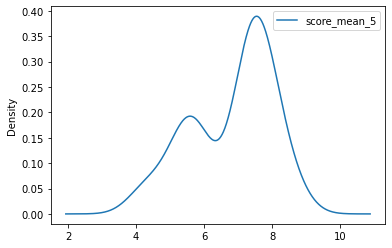

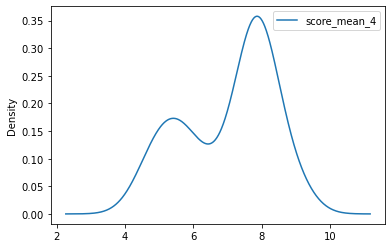

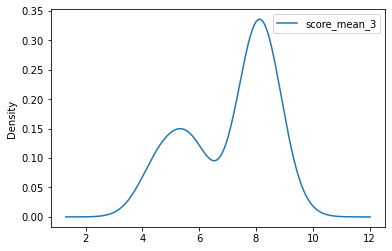

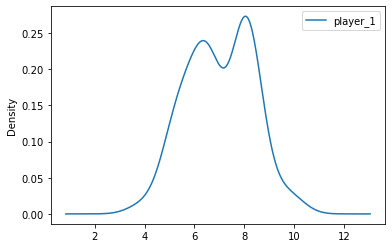

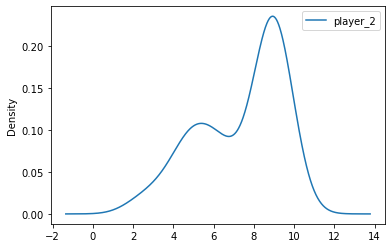

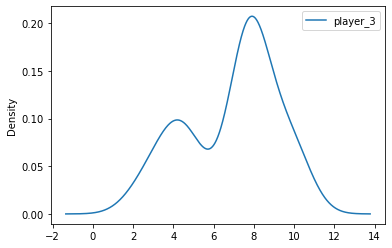

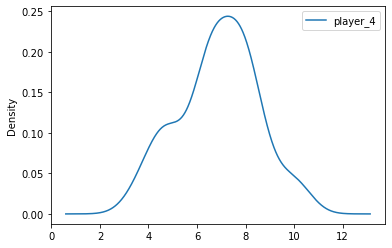

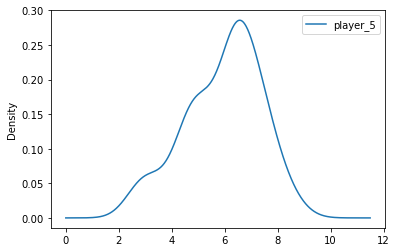

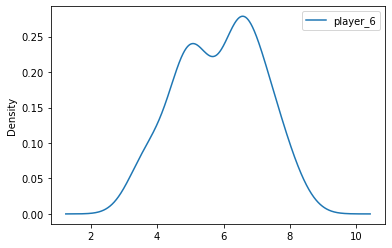

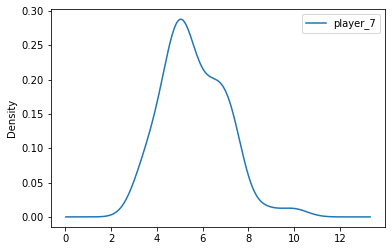

In [126]:
for col_idx in range(len(all_cols)-2):
    score_df[[all_cols[col_idx]]].plot.kde()